In [22]:
#Importing dependencies
#==================================================================
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns; sns.set(style ='white', color_codes = True)

In [2]:
df = pd.read_csv("stats.csv")
df

,Unnamed: 0,name,height,weight,NCAA__3ptapg,NCAA_fgapg,NCAA_ftapg,NCAA_ppg,NBA__3ptapg,NBA_fga_per_game,NBA_fta_p_g,NBA_ppg
0,0,Alaa Abdelnaby,82.0,240.0,0.0,5.6,2.5,8.5,0.0,4.8,1.3,5.7
1,1,Zaid Abdul-Aziz,81.0,235.0,NaN,16.8,10.4,22.3,NaN,8.2,2.8,9.0
2,2,Kareem Abdul-Jabbar,86.0,225.0,NaN,16.8,7.9,26.4,0.0,18.1,6.0,24.6
3,3,Mahmoud Abdul-Rauf,73.0,162.0,7.2,21.9,6.4,29.0,2.3,13.6,2.0,14.6
4,4,Tariq Abdul-Wahad,78.0,223.0,1.7,10.4,4.4,13.6,0.3,7.3,2.2,7.8
...,...,...,...,...,...,...,...,...,...,...,...,...
4980,4980,Ante Žižić,82.0,266.0,NaN,NaN,NaN,NaN,0.0,4.2,1.6,6.0
4981,4981,Jim Zoet,85.0,240.0,NaN,2.9,1.0,3.2,0.0,0.7,0.0,0.3
4982,4982,Bill Zopf,73.0,170.0,NaN,NaN,NaN,NaN,NaN,2.5,0.7,2.2
4983,4983,Ivica Zubac,84.0,240.0,NaN,NaN,NaN,NaN,0.0,5.4,2.1,8.0


In [10]:
#Dropping Unnamed for graphing purposes
df_stats = df.drop(columns=['Unnamed: 0'])

In [18]:
def CorrMtx(df_stats, dropDuplicates = True):
    
    # Exclude duplicate correlations by masking uper right values
    
    if dropDuplicates:    
        mask = np.zeros_like(df_stats, dtype=np.bool_)
        mask[np.triu_indices_from(mask)] = True
    
    # Set background color / chart style
    sns.set_style(style = 'white')
    
    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(16, 12))
    
    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)
    
    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df_stats, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df_stats, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)

<AxesSubplot:>

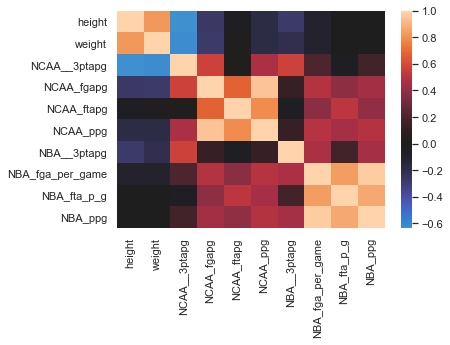

In [19]:
#Creating a heat map to illustrate the features corrrelation to each other
sns.heatmap(df_stats.corr(), center=0)

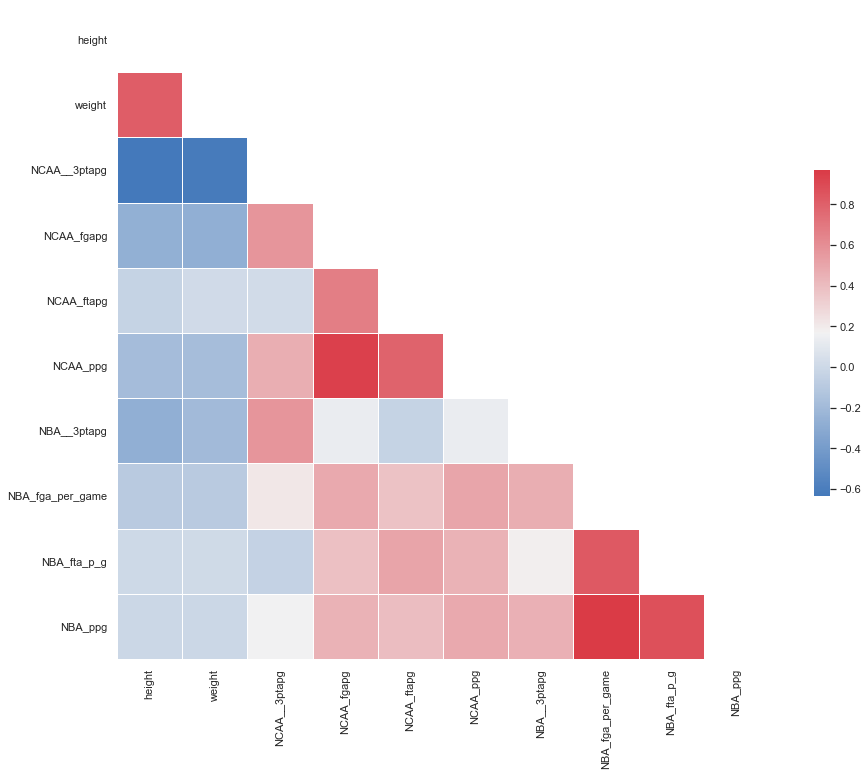

In [20]:
#Just 
CorrMtx(df_stats.corr(), dropDuplicates=True)

# Quick Observations

I was just testing out a way to look at whether the certain features are affected by one another.
I'm sure that if we add in assists, rebounds, blocks, steals, turnovers and turn if "drafted/undrafted" into a get_dummies we may get a better picture of which features we may want to keep. Maybe not

In [23]:
df2 = pd.read_csv("players.csv")
df2

,Unnamed: 0,NBA__3ptapg,NBA__3ptpct,NBA__3ptpg,NBA_efgpct,NBA_fg%,NBA_fg_per_game,NBA_fga_per_game,NBA_ft%,NBA_ft_per_g,...,NCAA__3ptpg,NCAA_efgpct,NCAA_fgapg,NCAA_fgpct,NCAA_fgpg,NCAA_ft,NCAA_ftapg,NCAA_ftpg,NCAA_games,NCAA_ppg
0,0,0.0,0.000,0.0,0.502,0.502,2.4,4.8,0.701,0.9,...,0.0,NaN,5.6,0.599,3.3,0.728,2.5,1.8,134.0,8.5
1,1,NaN,NaN,NaN,NaN,0.428,3.5,8.2,0.728,2.0,...,NaN,NaN,16.8,0.465,7.8,0.645,10.4,6.7,75.0,22.3
2,2,0.0,0.056,0.0,0.559,0.559,10.2,18.1,0.721,4.3,...,NaN,NaN,16.8,0.639,10.7,0.628,7.9,5.0,88.0,26.4
3,3,2.3,0.354,0.8,0.472,0.442,6.0,13.6,0.905,1.8,...,2.7,NaN,21.9,0.474,10.4,0.863,6.4,5.5,64.0,29.0
4,4,0.3,0.237,0.1,0.422,0.417,3.1,7.3,0.703,1.6,...,0.6,NaN,10.4,0.477,4.9,0.726,4.4,3.2,87.0,13.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4973,4973,0.0,NaN,0.0,0.581,0.581,2.4,4.2,0.711,1.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4974,4974,0.0,NaN,0.0,0.200,0.200,0.1,0.7,NaN,0.0,...,NaN,NaN,2.9,0.476,1.4,0.429,1.0,0.4,63.0,3.2
4975,4975,NaN,NaN,NaN,NaN,0.363,0.9,2.5,0.556,0.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4976,4976,0.0,0.100,0.0,0.595,0.595,3.2,5.4,0.762,1.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df2_stats = df2.drop(columns=['Unnamed: 0', 'NBA_efgpct','NCAA_efgpct'])

<AxesSubplot:>

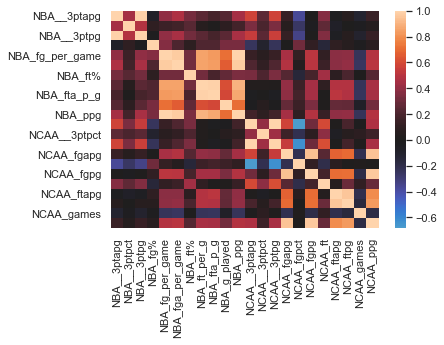

In [32]:
#Creating a heat map to illustrate the features corrrelation to each other
sns.heatmap(df2_stats.corr(), center=0)

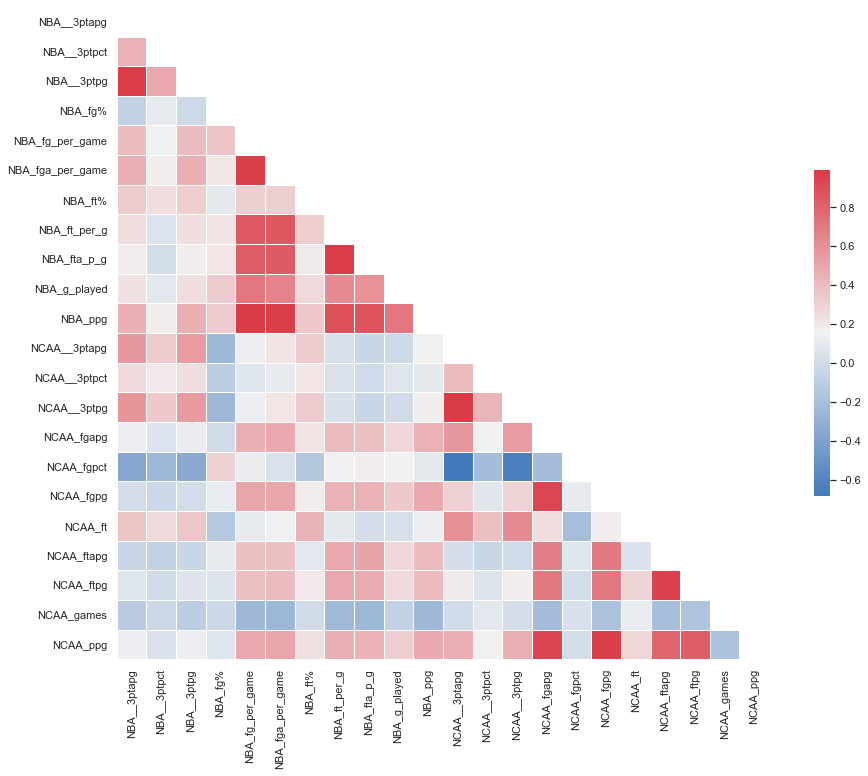

In [33]:
CorrMtx(df2_stats.corr(), dropDuplicates=True)

In [ ]:
df3 = pd.read_csv("../dataget")